In [1]:
import pandas as pd
titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'

titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

Text(0.5, 1.0, 'Count plot - survived')

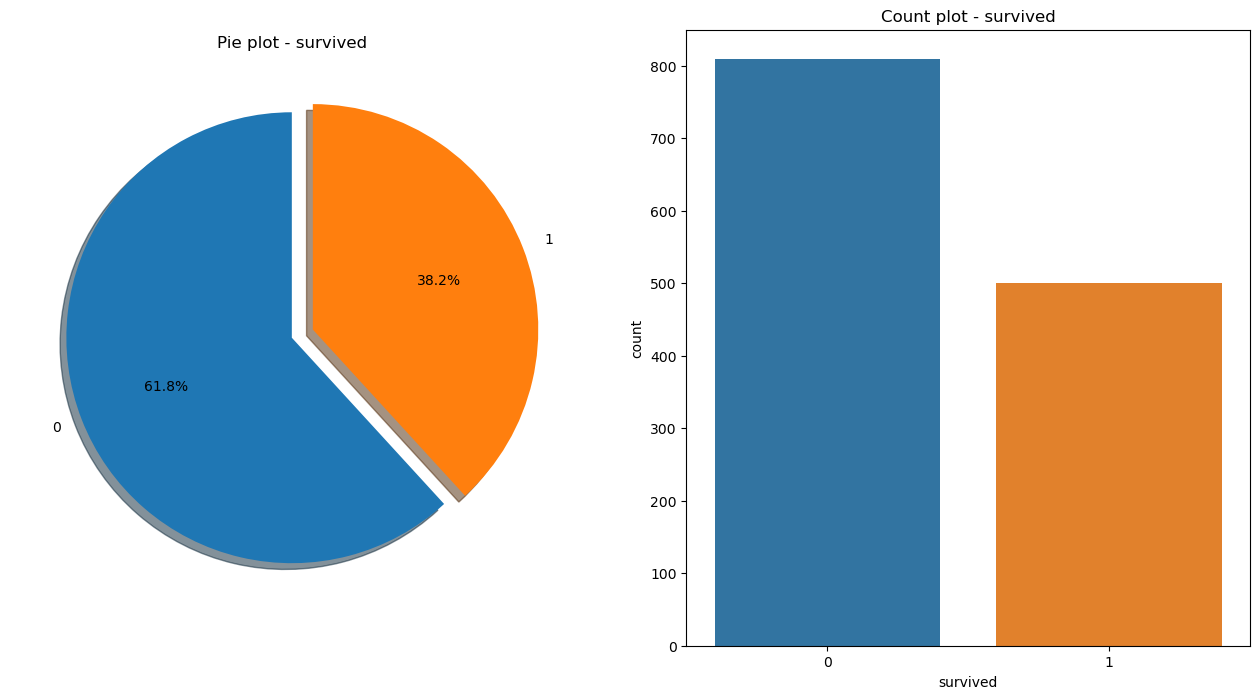

In [3]:
f, ax = plt.subplots(1,2, figsize=(16,8)) # 1행 2열 return값은 matplot.figure와 np.ndarray형의 ax

titanic['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', shadow=True, 
                                            startangle=90, explode=[0, 0.1]
                                            )

ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x = 'survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

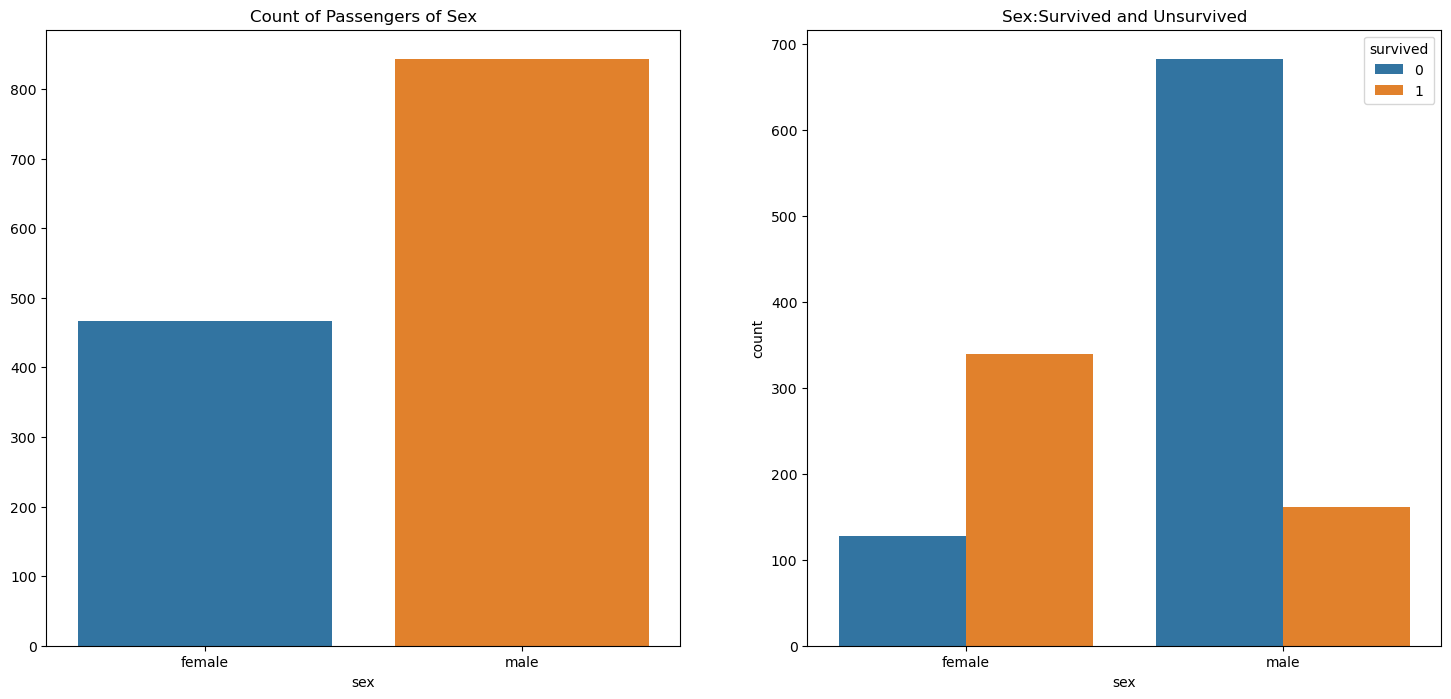

In [4]:
f2, ax2 = plt.subplots(1,2, figsize=(18,8)) # 1행 2열 return값은 matplot.figure와 np.ndarray형의 ax

sns.countplot(x='sex', data=titanic, ax=ax2[0])
ax2[0].set_title('Count of Passengers of Sex')
ax2[0].set_ylabel('')

sns.countplot(x = 'sex',data=titanic, hue='survived', ax=ax2[1])
ax2[1].set_title('Sex:Survived and Unsurvived')
plt.show()

In [5]:
# 경제력 대비 생존률
# 1등실에는 여성이 많이 타고 있었나?
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True).style.background_gradient(cmap='summer_r')

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


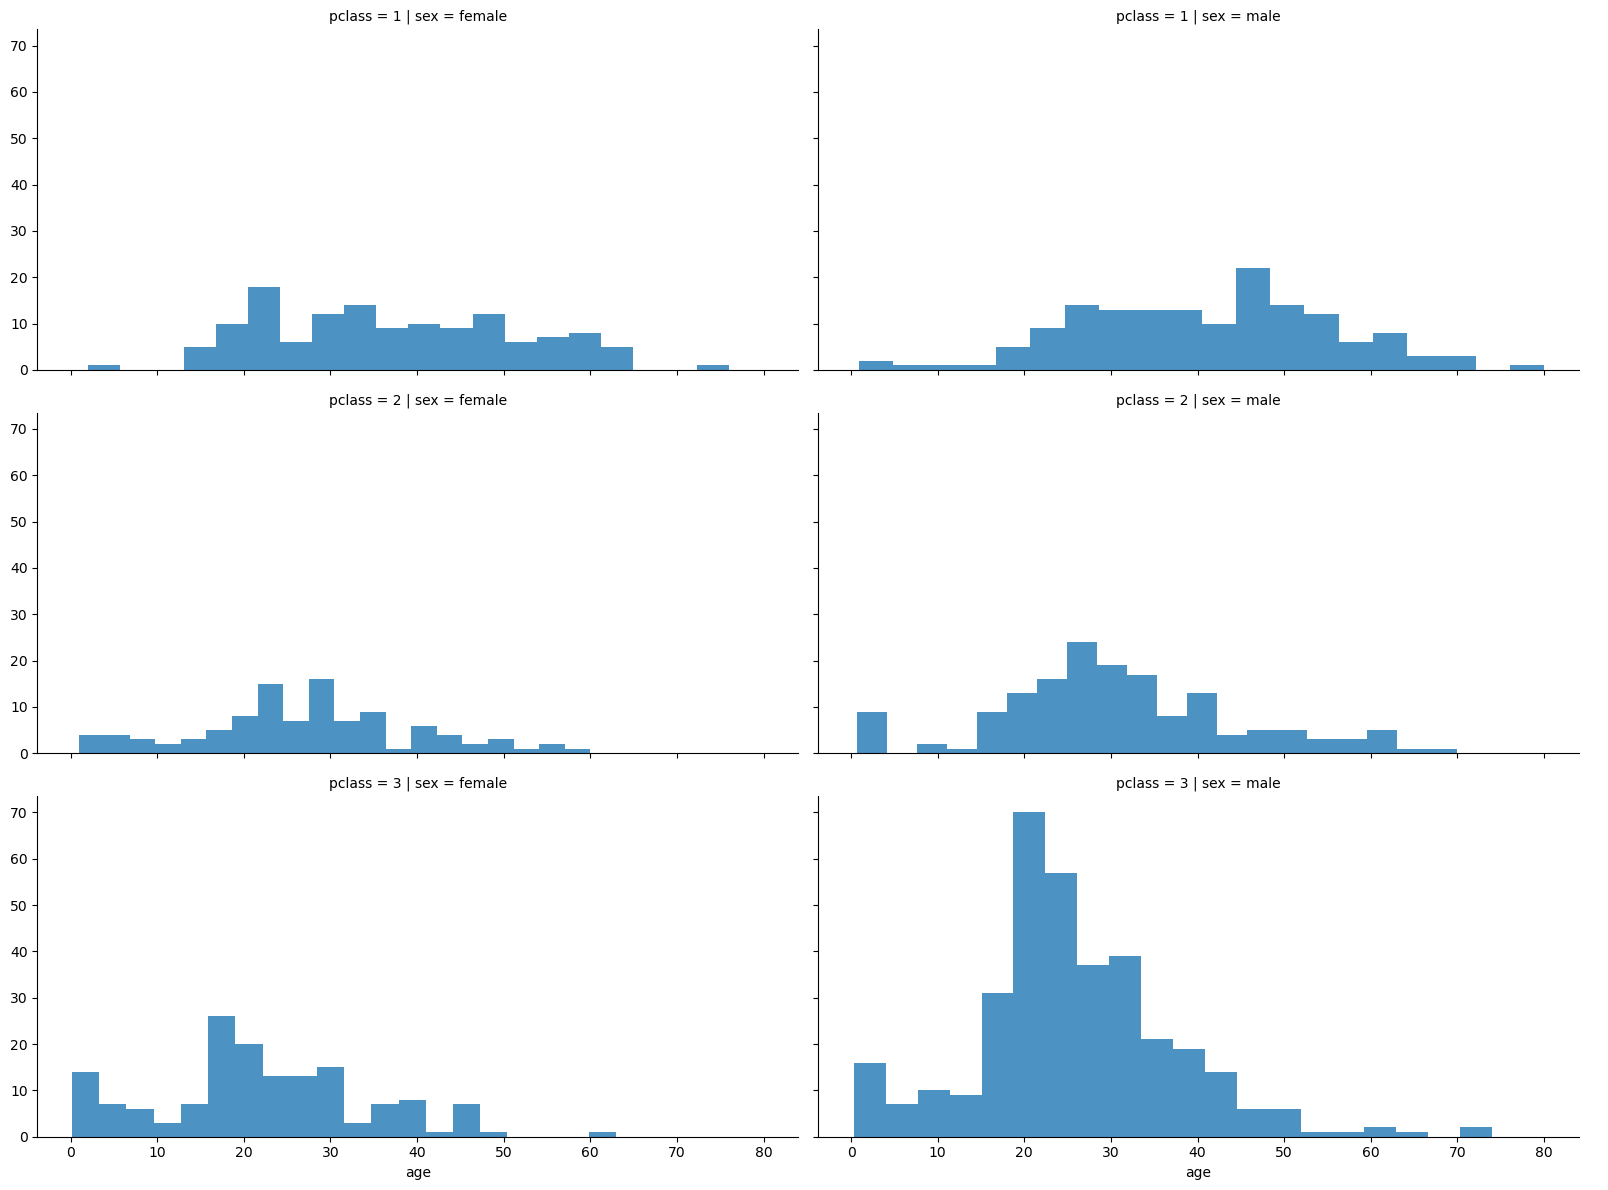

In [6]:
grid = sns.FacetGrid(titanic, col='sex', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20)
grid.add_legend()

# 3등실의 20-30 남성이 많은데 이 사람들이 많이 죽어서 남성 생존률이 낮게 나온 것인가?

In [7]:
import plotly.express as px
fig = px.histogram(titanic, x='age')
fig.show()

In [8]:
fig = px.histogram(titanic, x='age', color='survived', marginal='violin', hover_data=titanic.columns)
fig.show()

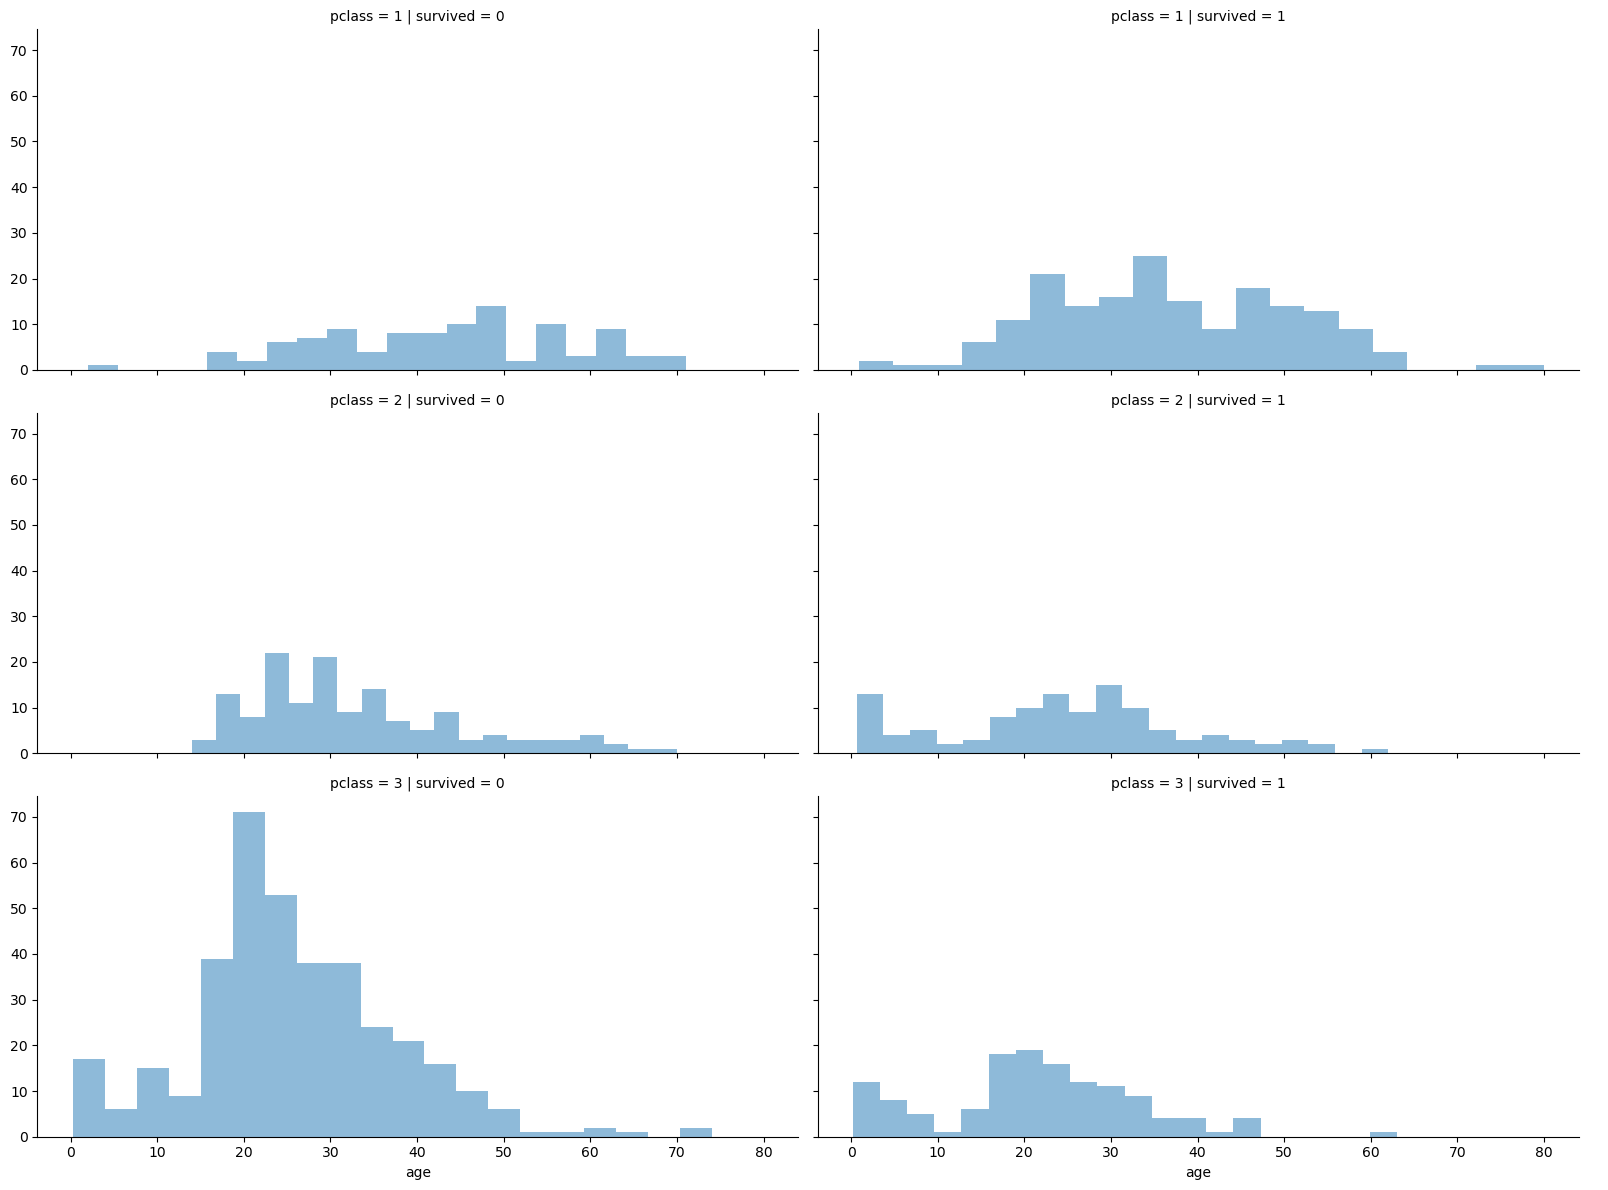

In [9]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [10]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0, 3, 10, 20, 50, 100], include_lowest=True, labels=['baby', 'infant', 'teenage', 'adult', 'old'])
titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult


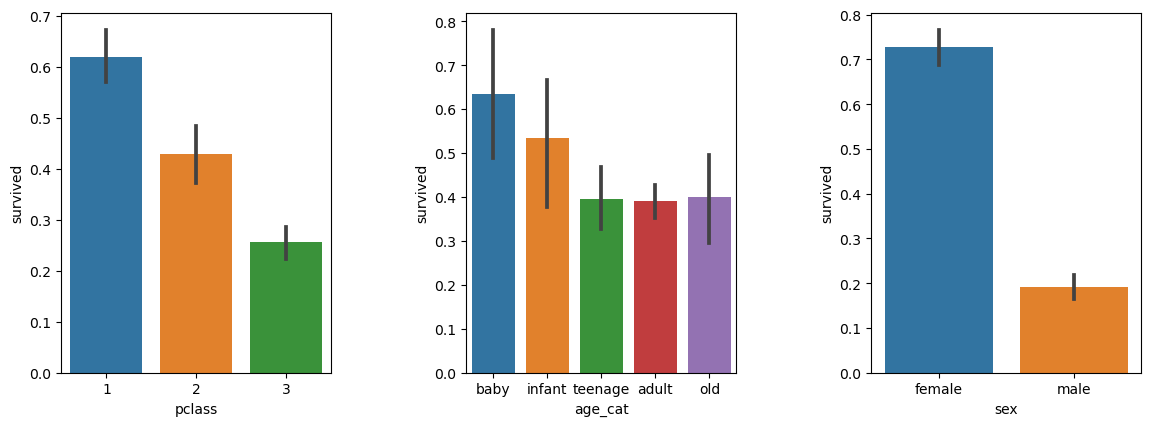

In [12]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot(x = 'pclass', y= 'survived', data=titanic)
plt.subplot(132)
sns.barplot(x = 'age_cat', y= 'survived', data=titanic)
plt.subplot(133)
sns.barplot(x = 'sex', y = 'survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)